#### Locally Weighted Linear Regression

Most of the code is same from last time. Only the loss and grad_loss functions are different.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
%matplotlib notebook

We begin by loading the data and estimating the graph using pandas.

<IPython.core.display.Javascript object>


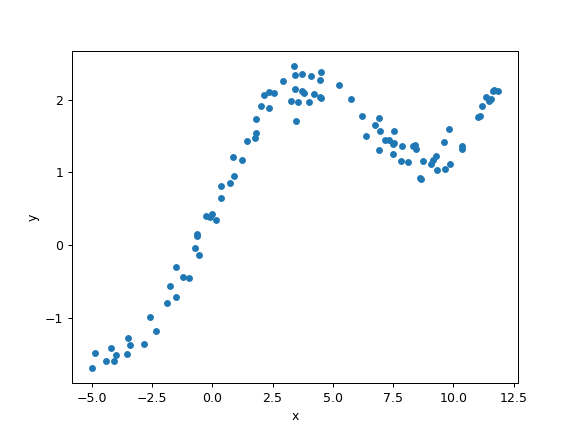

In [2]:
data = pd.concat([pd.read_table('q3x.dat', names = ['x']),pd.read_table('q3y.dat', names = ['y'])], axis=1)
data.plot(kind='scatter', x='x', y='y')

Hmm.

Normalize the inputs and store it in numpy array. Finally Concatenate 1 to the inputs as a simple way to introduce the bias term.

In [3]:
inputs = data.values[:,0:1]
targets = data.values[:,1:2]

inputs_mean = np.mean(inputs, axis=0)
inputs_std = np.std(inputs,axis=0)
inputs = (inputs - inputs_mean)/(inputs_std + np.finfo(float).eps)
inputs = np.concatenate((np.ones((inputs.shape[0],1)),inputs),axis=1)

For this question, we have to use the normal form for all calculations. First for unwieghted linear regression:

<IPython.core.display.Javascript object>


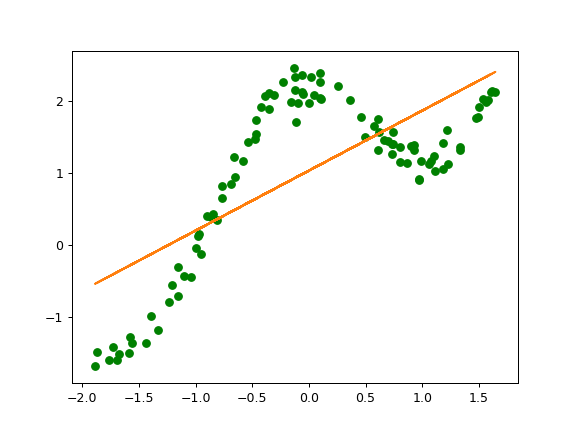

In [5]:
unweighted_solution = np.linalg.inv(inputs.T.dot(inputs)).dot(inputs.T).dot(targets)

fig = plt.figure()
plt.plot(inputs, inputs*unweighted_solution[1] + unweighted_solution[0])
plt.scatter(inputs[:,1:2],targets,c='g')
plt.show()

Of course, it doesn't fit.

Now we make a function that returns the W (Weights) diagonal matrix for given input and bandwidth. Also, we choose the test points uniformly from the same range as training data.

We plot the training data in green points, and test data in blue points.

<IPython.core.display.Javascript object>


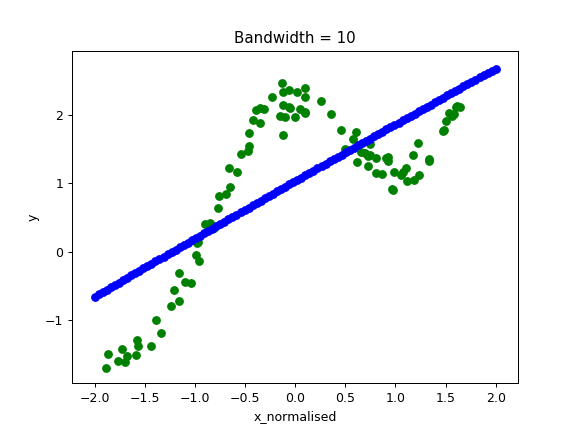

In [10]:
def get_W(x,Tau):
    return np.diag(np.exp(-((inputs[:,1] - x)**2)/(2*Tau*Tau)))

test_inputs = np.linspace(-2,2,num=100)
test_results = np.empty_like(test_inputs)

for t,x in enumerate(test_inputs):
    W=get_W(x,10)
    weights = np.linalg.inv(inputs.T.dot(W).dot(inputs)).dot(inputs.T).dot(W).dot(targets)
    test_results[t] = weights[0][0] + weights[1][0]*x

fig = plt.figure()
plt.scatter(inputs[:,1:2],targets,c='g')
plt.scatter(test_inputs,test_results,c='b')

plt.xlabel('x_normalised')
plt.ylabel('y')
plt.title('Bandwidth = 10')
plt.show()

Now we can change the value of bandwidth to see its effect on the output.